<a href="https://colab.research.google.com/github/mshassanpour/clinical-data-science-projects/blob/main/notebooks/cigarettes_diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Question:** Is there a relationship between the number of cigarettes smoked per day and the prevalence of diabetes? Run a statistical test to determine significance, interpret the results and create a visualization to display this.


Steps to investigate the potential relationship between the daily number of cigarettes smoked and the prevalence of diabetes are outlined as follows:

1- Data Preparation,
2- Data Exploration,
3- Handling Missing Values,
4- Additional Data Cleaning.

5- Statistical Analysis

**Results Interpretation:**
**Result 1:** Correlation Findings: The analysis revealed a point-biserial correlation coefficient of -0.036 between 'cigsPerDay' and diabetes. This negative value suggests a weak inverse relationship, indicating that as cigarette consumption increases, the prevalence of diabetes marginally decreases.
Statistical Significance: Despite the weak correlation, the p-value was found to be less than 0.05, confirming the statistical significance of this relationship.

These findings are interesting,  a statistically significant, but weak, inverse correlation between the number of cigarettes smoked per day and the prevalence of diabetes. Further research and analysis would be beneficial to explore the underlying factors contributing to this relationship.

Since there is a low prevalence of diabetes within this patient population, to address the imbalance, I utilized two different strategies: (1) under sampling the majority class (no diabetes), and (2) adjusting class weights in the Logistic Regression model from scikit-learn.

**Result 2:** The point-biserial correlation coefficient between cigsPerDay and diabetes in under sampled data is still negative (-0.129), while indicating slightly stronger inverse relationship, but with a p-value above 0.05, this correlation is statistically insignificant!

**Result 3:** The correlation coefficient between cigsPerDay and diabetes from Logistic Regression model is still negative (-0.023), indicating an inverse relationship. To assess the statistical significance of the regression coefficient, I employed statistical analysis from the 'regressors' package. The p-value was below 0.05, so, the correlation is statistically significant!

While correlations were significant in the first and the last assessment (results 1 and 3) but not significant in second assessment because they have more power (large sample size) to detect small effects compared to second assessment.

Overall, with a low correlation coefficient, even though statistically significant, the number of cigarettes per day may not have a predictive power of diabetes presence in this patient’s population. I also, does not rule out the possibility of a strong non-linear relationship between them. Therefore, further analysis using different methods might be necessary to uncover the true nature of the relationship.





In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Copy the data folder to Colab
!cp -r /content/drive/MyDrive/data_split /content

Mounted at /content/drive


In [ ]:
# explre files
import pandas as pd
import os

folder_path = '/content/data_split'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
csv_files
number_of_csv_files = len(csv_files)
print ('numner of csv files in the data_split folder: ' + str(number_of_csv_files))
# there aree 4 csv files

print(csv_files)

numner of csv files in the data_split folder: 4
['patient_history.csv', 'patient_note.csv', 'patient_clinical.csv', 'patient_demographics.csv']


In [ ]:
# Lets start with patient_note.csv file
file_path = os.path.join(folder_path, 'patient_note.csv')
patient_note = pd.read_csv(file_path)
print(patient_note.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  2611 non-null   object 
 1   Note        2611 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 163.3+ KB
None


In [ ]:
# drop columns that have all NaN values
patient_note = patient_note.dropna(axis=1, how='all')
patient_note.head(5)

unique_patient_ids = patient_note['patient_id'].nunique()
print(f'There are {unique_patient_ids} unique patient IDs ')
unique_notes = patient_note['Note'].nunique()
print(f'There are {unique_notes} unique Notes ')

There are 2611 unique patient IDs 
There are 16 unique Notes 


"patient_note.csv" has 2611 entries and two non NAN columns including 2611 unique patients' IDs and  16 different Notes

Below, I will explore "patient_note" further



number of different Notes: 16
2611
Note
F/U to procedure                                                               10.953658
Nausea, indigestion, heartburn (PRN)                                            9.153581
PRO: tightness in chest                                                         7.200306
chest pain                                                                      1.800077
insurance denied new medicaiton                                                 7.276905
medication review                                                              14.553811
patient often fatigued                                                          1.800077
patient reports being out of breath, feeling pain in the chest                  7.276905
patient reports feeling pressure in the chest off and on                        7.276905
patient reports fluttering and irregular pain                                   7.276905
patient reports pain in arm but otherwise says they feel fine         

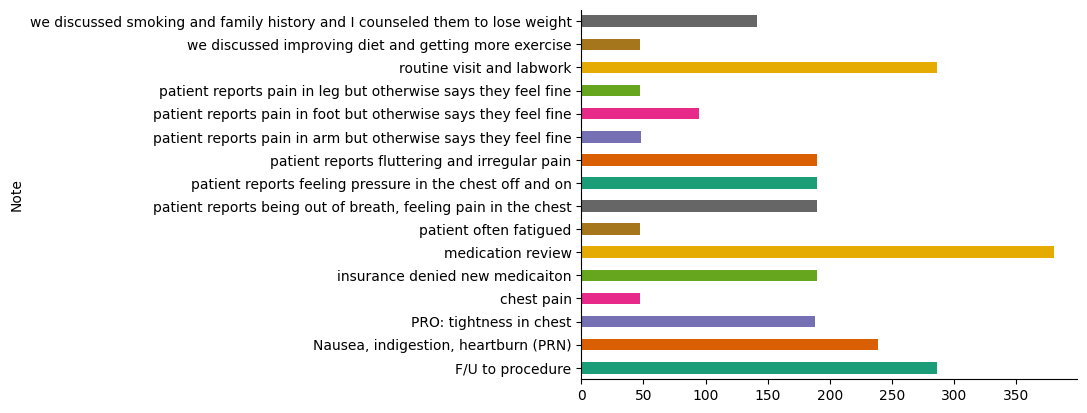

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = patient_note.groupby('Note').size()
print('number of different Notes: ' + str(len(counts)))
print(sum(counts)) # should be same as number off entries 2611

counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=counts.shape[0]))
plt.gca().spines[['top', 'right']].set_visible(False)

print(100*counts/sum(counts))

From the analysis above, it's evident that the majority of doctor visits were primarily for medication reviews, followed by routine visits, lab work, and follow-ups procedures.

Given that this data is fabricated, I am not concerned about seeing an identical number of instances for specific conditions, such as 'patient reports being out of breath, feeling pain in the chest' and 'patient reports feeling pressure in the chest off and on.' In a real dataset, such exact matches might raise concerns about duplicate entries or potential dependencies between records.

Due to time constraints, I will proceed to examine the other data files and may revisit this analysis later.

In [ ]:
# Lets look at  patient_history.csv file
file_path = os.path.join(folder_path, 'patient_history.csv')
patient_history = pd.read_csv(file_path)
print(patient_history.info())

patient_history.head(10)


unique_patient_ids2 = patient_history['patient_id'].nunique()
print(f'There are {unique_patient_ids2} unique patient IDs ')


unique_entries= patient_history.nunique()
print(unique_entries)

print(patient_history.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       4229 non-null   object 
 1   currentSmoker    4229 non-null   int64  
 2   cigsPerDay       4200 non-null   float64
 3   BPMeds           4176 non-null   float64
 4   prevalentStroke  4229 non-null   int64  
 5   prevalentHyp     4229 non-null   int64  
 6   diabetes         4229 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 231.4+ KB
None
There are 4229 unique patient IDs 
patient_id         4229
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
dtype: int64
       currentSmoker   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp  \
count    4229.000000  4200.000000  4176.000000      4229.000000   4229.000000   
mean        0.494207     9.000238

The file 'patient_history.csv' contains 4,229 entries, each corresponding to a unique patient ID, along with six additional columns. These columns include smoking status, daily cigarette consumption, blood pressure medication status, as well as histories of stroke, hypertension, and diabetes. Information about cigsPerDay and BPMeds is missing for some patients.

Below, I will check to see if the entries that have missing cigsPerDay are those that have reported not currently smoking.


In [ ]:
missing_cigs = patient_history[(pd.isnull(patient_history['cigsPerDay'])) ]
print('number of missing cigsPerDay: ' + str(len(missing_cigs)))

missing_cigs_non_smokers = patient_history[(pd.isnull(patient_history['cigsPerDay'])) & (patient_history['currentSmoker'] == 0)]
print(missing_cigs_non_smokers)


non_smokers_with_nonZero_cigsPerDay = patient_history[(patient_history['cigsPerDay']!=0) & (patient_history['currentSmoker'] == 0)]
print('number of non smokers with non zero cigsPerDay: ' + str(len(non_smokers_with_nonZero_cigsPerDay)))


number of missing cigsPerDay: 29
Empty DataFrame
Columns: [patient_id, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes]
Index: []
number of non smokers with non zero cigsPerDay: 0


It apears that all the 29 entries that have missing number of cigsPerDay have repoted to be currently smooking.

I was also curious to see if there are any instances where the current smoking status is 0, yet the number of cigarettes smoked per day is not zero. It turned out that is not the case.



Below I will plot the histogram of cigsPerDay to check its distribution and to spot outliers or anomalies.*italicized text*

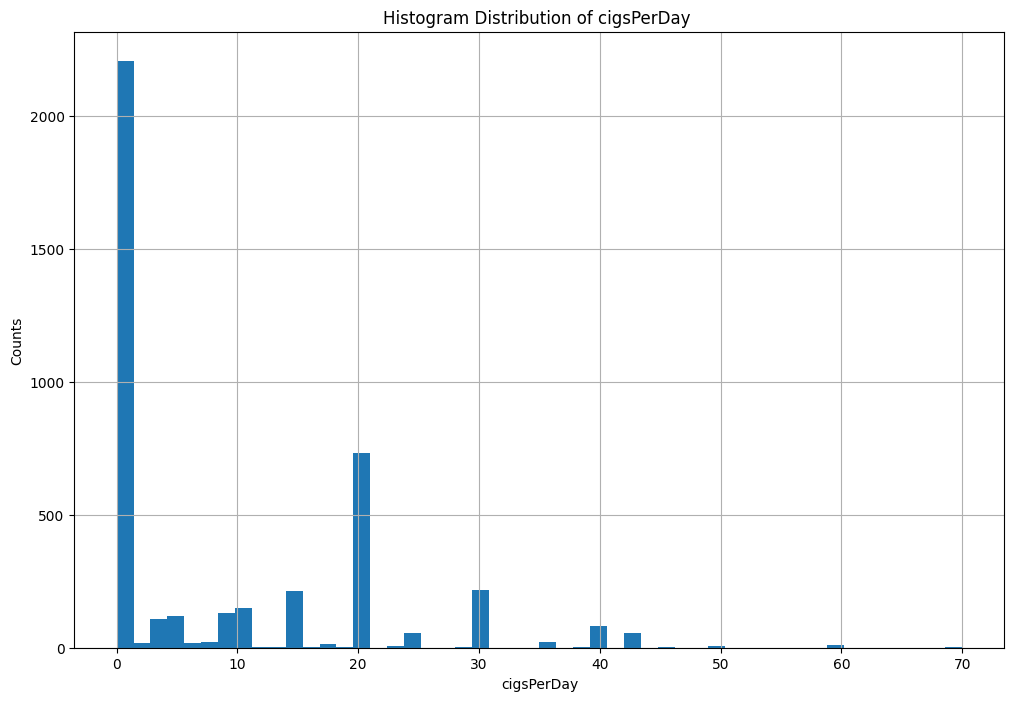

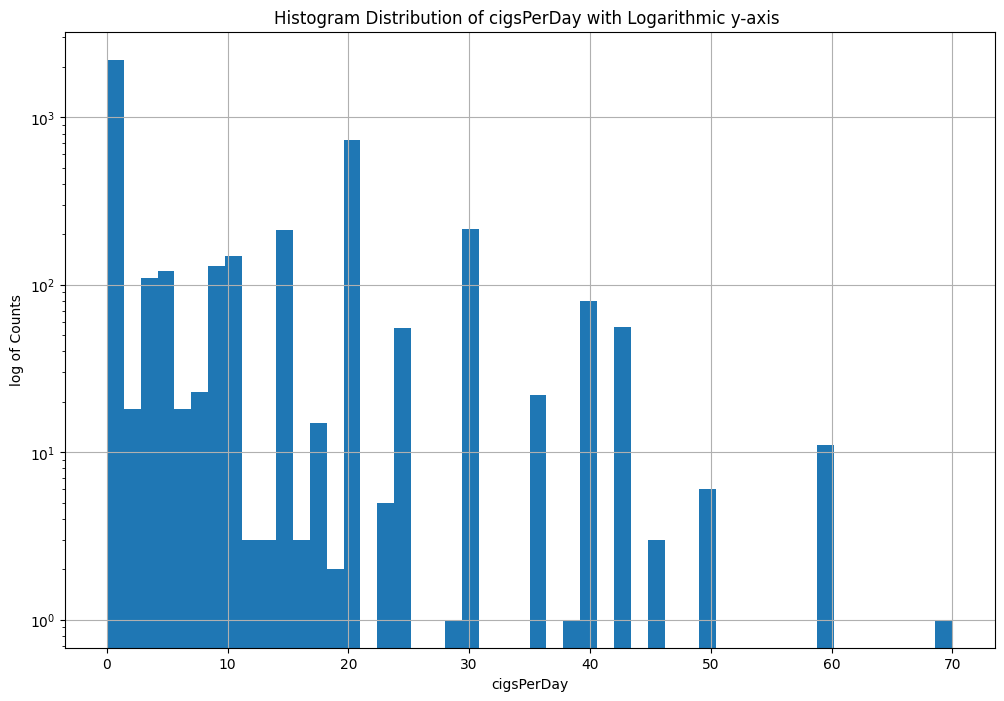

In [ ]:
# plot the histogram of cigsPerDay
patient_history["cigsPerDay"].hist(bins = 50 , figsize=[12,8])
plt.title('Histogram Distribution of cigsPerDay ')
plt.xlabel('cigsPerDay')
plt.ylabel('Counts')
plt.show()

# plot the histogram of cigsPerDay with Logarithmic y-axis
patient_history["cigsPerDay"].hist(bins = 50 , figsize=[12,8])
plt.yscale('log')
plt.title('Histogram Distribution of cigsPerDay with Logarithmic y-axis ')
plt.xlabel('cigsPerDay')
plt.ylabel('log of Counts')
plt.show()


I don't think there are any outliers in cigsPerDay.

Now, I turn my attention to handling missing values in the 'cigsPerDay' column. I'm faced with two options: removing the entries with missing values or imputing them. Given that all missing values correspond to smokers, if I choose to impute, I would use a non-zero value—specifically, either the mode or the mean of 'cigsPerDay' among individuals identified as smokers.

Below are the calculations for both the mean and mode. However, I lean towards removing these entries, as they constitute only a small portion of the dataset.

In [ ]:
# Calculate the mean and mode of 'cigsPerDay' for rows where 'currentSmoker' is non-zero
mean_cigs_per_day_for_smokers =patient_history.loc[patient_history['currentSmoker'] != 0, 'cigsPerDay'].mean()
mode_cigs_per_day_for_smokers =patient_history.loc[patient_history['currentSmoker'] != 0, 'cigsPerDay'].mode()

print(f"The mean of 'cigsPerDay' for smokers is: {mean_cigs_per_day_for_smokers}")
print(f"The mode of 'cigsPerDay' for smokers is: {mode_cigs_per_day_for_smokers}")


patient_history_cleaned = patient_history.dropna(subset=['cigsPerDay'])
print(patient_history_cleaned.info())

The mean of 'cigsPerDay' for smokers is: 18.341096555070354
The mode of 'cigsPerDay' for smokers is: 0    20.0
Name: cigsPerDay, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 4228
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       4200 non-null   object 
 1   currentSmoker    4200 non-null   int64  
 2   cigsPerDay       4200 non-null   float64
 3   BPMeds           4147 non-null   float64
 4   prevalentStroke  4200 non-null   int64  
 5   prevalentHyp     4200 non-null   int64  
 6   diabetes         4200 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 262.5+ KB
None


I will now look at missing data for blood pressure medication and will see how many of them are in patients with hypertension.

In [ ]:
missing_BPMeds = patient_history_cleaned[(pd.isnull(patient_history_cleaned['BPMeds'])) ]
print('number of missing BPMeds: ' + str(len(missing_BPMeds)))

missing_BPMeds_prevalentHyp = patient_history_cleaned[(pd.isnull(patient_history_cleaned['BPMeds'])) & (patient_history_cleaned['prevalentHyp'] == 1)]
print('number of missing BPMeds with hypertension: ' + str(len(missing_BPMeds_prevalentHyp)))

number of missing BPMeds: 53
number of missing BPMeds with hypertension: 22


Among the 53 entries missing BPMeds data, 22 have hypertension. To address these missing values here, I am inclined to exclude the entries with hypertension and for the remaining 31 entries, I will impute a value of 0 for BPMeds.

In [ ]:
indices_to_drop = patient_history_cleaned[(patient_history_cleaned['BPMeds'].isna()) & (patient_history_cleaned['prevalentHyp'] == 1)].index
indices_to_impute = patient_history_cleaned[(patient_history_cleaned['BPMeds'].isna()) & (patient_history_cleaned['prevalentHyp'] == 0)].index

# Drop these rows from the DataFrame
patient_history_cleaned.loc [indices_to_impute , 'BPMeds']=0

patient_history_cleaned = patient_history_cleaned.drop(index=indices_to_drop)
print(patient_history_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 0 to 4228
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       4178 non-null   object 
 1   currentSmoker    4178 non-null   int64  
 2   cigsPerDay       4178 non-null   float64
 3   BPMeds           4178 non-null   float64
 4   prevalentStroke  4178 non-null   int64  
 5   prevalentHyp     4178 non-null   int64  
 6   diabetes         4178 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 261.1+ KB
None


Now that the missing values have been addressed, I will proceed to examine the data in more detail.

Lets explore the relationship between variables.  

In [ ]:
# calculate the point-biserial correlation coefficient to examine the relationship
# between number of cigarettes per day and stroke

from scipy.stats import pointbiserialr
import numpy as np

# calculatte the correlation between cigsPerDay and prevalentStroke
corr, p_value = pointbiserialr(patient_history_cleaned['prevalentStroke'], patient_history_cleaned['cigsPerDay'])

print(' correlation coefficient between cigsPerDay and prevalentStroke: ' , str(corr))

print(' p-value: ' , str(p_value))


 correlation coefficient between cigsPerDay and prevalentStroke:  -0.031217389099191747
 p-value:  0.04362247515554061


The correlation coefficient between cigsPerDay and prevalentStroke is negative, indicating an inverse relationship, with a p-value less than 0.05, this correlation is statistically significant!

In [ ]:
# calculate the point-biserial correlation coefficient to examine the relationship
# between number of cigarettes per day and hypertension

# calculatte the correlation between cigsPerDay and prevalentStroke
corr, p_value = pointbiserialr(patient_history_cleaned['prevalentHyp'], patient_history_cleaned['cigsPerDay'])

print(' correlation coefficient between cigsPerDay and prevalentHyp: ' , str(corr))

print(' p-value: ' , str(p_value))


 correlation coefficient between cigsPerDay and prevalentHyp:  -0.06519302421159767
 p-value:  2.4742426238102347e-05


The correlation coefficient between cigsPerDay and prevalentHyp is negative, indicating an inverse relationship, with a p-value less than 0.05, this correlation is statistically significant!

<ipython-input-14-7d803de5d1e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = patient_history_cleaned.corr()


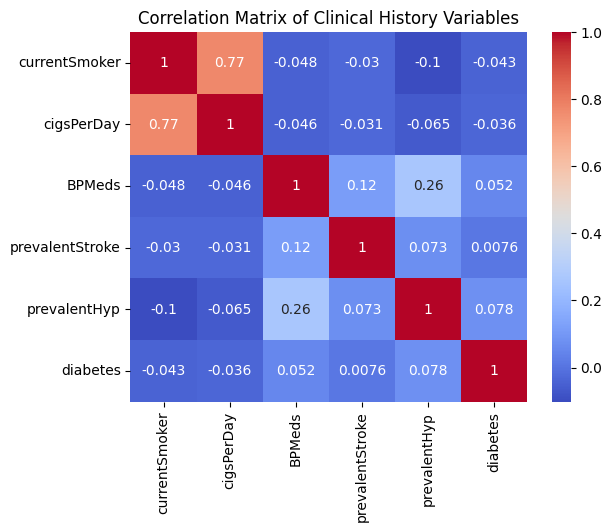

In [ ]:
corr_matrix = patient_history_cleaned.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Clinical History Variables')
plt.show()

From above, it seems there is a strng correlaion

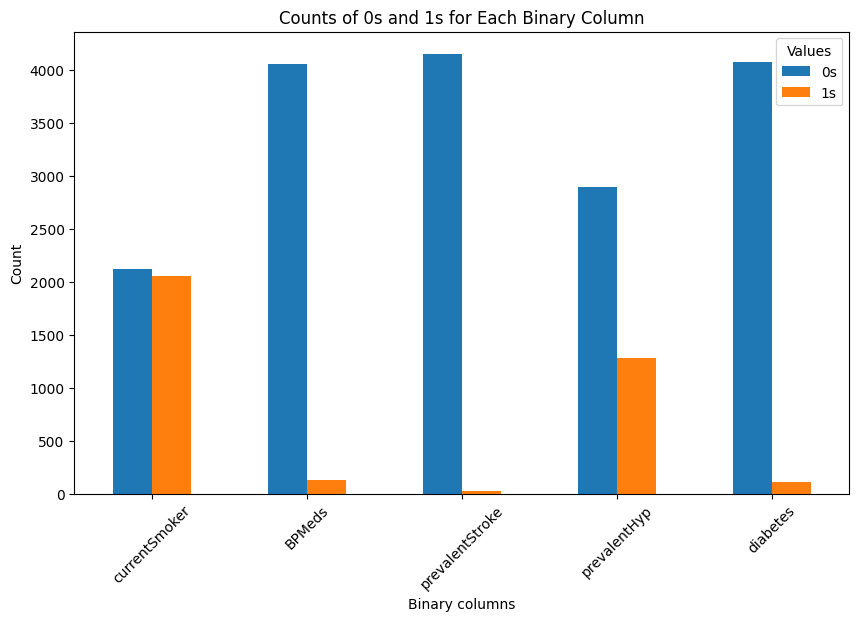

In [ ]:
binary_columns = [col for col in patient_history_cleaned.columns if patient_history_cleaned[col].dropna().isin([0, 1]).all()]

counts = patient_history_cleaned[binary_columns].apply(pd.Series.value_counts).T

# Plot grouped bar chart
counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Counts of 0s and 1s for Each Binary Column')
plt.xlabel('Binary columns')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.legend(title='Values', labels=['0s', '1s'])
plt.show()

Based on the plot above, it is evident that there is a low prevalence of stroke, diabetes, and the use of blood pressure medication within this patient population. Such an imbalance can significantly impact the performance of predictive models. Therefore, it's crucial to employ techniques specifically designed to handle imbalanced data.



In the following analysis, I will first do a simple correrlatin analysis forgetting about the imbalance.
Then I aim to explore the relationship between stroke occurrence and hypertension, smoking status, blood pressure medication usage, and the number of cigarettes smoked per day. To achieve this, I will utilize the Logistic Regression model from scikit-learn an

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=10000)

X = patient_history_cleaned[['currentSmoker','cigsPerDay','BPMeds', 'prevalentHyp', 'diabetes']].copy()
y = patient_history_cleaned ['prevalentStroke']

model.fit(X,y)

coefficients = model.coef_[0]
intercept = model.intercept_
print(coefficients)
print(intercept)
feature_names = X.columns
print(feature_names)

coeff_dict = {}

i=0
for f in feature_names:
  coeff_dict[f]=coefficients[i]
  i+=1

print ('coefficients for features:',  coeff_dict)


[ 6.33143666e-04 -4.57307557e-02  1.55170970e+00  1.58182920e+00
 -4.05717762e-03]
[-0.72711268]
Index(['currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes'], dtype='object')
coefficients for features: {'currentSmoker': 0.0006331436658352082, 'cigsPerDay': -0.045730755734316515, 'BPMeds': 1.551709700373985, 'prevalentHyp': 1.5818292027501628, 'diabetes': -0.004057177623094137}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
print(classes)
print(weights)

[0 1]
[ 0.50288878 87.04166667]


Above, the coefficients of the logistic regression model for various features are displayed. Positive coefficients suggest a positive relationship with the outcome variable, and negative coefficients suggest a negative relationship. To assess the statistical significance of these coefficients, I will employ statistical analysis from the 'regressors' package.



In [ ]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 57.5.0 which is incompatible.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 57.5.0 which is incompatible.


  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12399 sha256=9345479532897a31f2bfd25e623abecc0e33bc383cb694c7b621d0ccc29229b6
  Stored in directory: /root/.cache/pip/wheels/85/e8/ec/b8fe5e2d41af2f4760b0d8ce1ae8f01c78df5d1b0883dee2fe
Successfully built regressors


In [ ]:
from regressors import stats

pvalues=stats.coef_pval(model, X, y)
print(pvalues)
print(feature_names)

df = pd.DataFrame({
    'Feature Name': feature_names,
    'Coefficient': coefficients,
    'pval': pvalues[1:]
})

df

[0.         0.97834467 0.         0.         0.         0.93202099]
Index(['currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes'], dtype='object')


,Feature Name,Coefficient,pval
0,currentSmoker,0.000633,0.978345
1,cigsPerDay,-0.045731,0.000000
2,BPMeds,1.551710,0.000000
3,prevalentHyp,1.581829,0.000000
4,diabetes,-0.004057,0.932021


In [ ]:

i=1
coeff_dict_pval={}
for f in feature_names:
  coeff_dict_pval[f]=pvalues[i]
  i+=1

coeff_dict_pval

{'currentSmoker': 0.9783446680474426,
 'cigsPerDay': 0.0,
 'BPMeds': 0.0,
 'prevalentHyp': 0.0,
 'diabetes': 0.932020991211505}